In [6]:
import warnings
warnings.filterwarnings('ignore')
dirName = 'jaffedbase'

In [7]:
import imageio
import os
import matplotlib.pyplot as plt
import numpy as np

def loadImages(dirName, class_mode='emotion'):
    '''
    # This function loads images from any directory
    # :param str dirName: is address of the directory (string)
    # :param str class_mode: is the classification mode (emotion or recognition) (string)
    '''
    assert class_mode in ['emotion', 'recognition'], "Class mode should be either 'emotion' or 'recognition'."
    data = []
    label = []
    for root, dirs, files in os.walk(dirName):
        for file in files:
            #face = scipy.misc.imread(os.path.join(root, file)) # Load image from a path
            face = imageio.imread(os.path.join(root, file))
            face = face.reshape(256 * 256, ).tolist()          # Flatten image. Note: size of any image is 256,256
            data.append(face)
            if class_mode == 'recognition':
                label.append(file.split('.')[0])
            if class_mode == 'emotion':
                label.append(file.split('.')[1][:2])
    return np.asarray(data) , label


number of images is 213 and number of features for each image is 65536


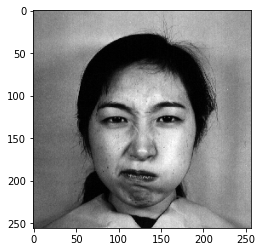

In [13]:

dataset, label = loadImages(dirName, class_mode='emotion')
print("number of images is" , dataset.shape[0] , "and number of features for each image is", dataset.shape[1])

### To show each images, you should reshape it to 256,256 and then use 'plt.imshow'
plt.imshow(dataset[0].reshape(256,256) , cmap='gray')
plt.show()

In [14]:
def z_norm(dataset):
  mean = np.mean(dataset,axis=0)
  std = np.std(dataset, axis=0)
  return (dataset-mean)/std

In [15]:
dataset_norm = z_norm(dataset)

In [16]:
dataset_norm.shape

(213, 65536)

In [19]:
from sklearn.decomposition import PCA

pca99 = PCA()
pca99.fit(data)

PCA()

In [20]:
pca99.n_components_

213

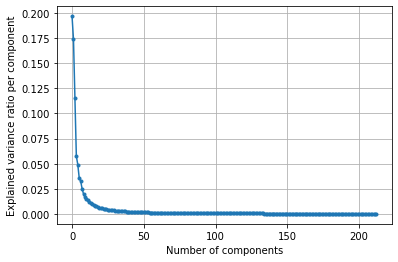

In [21]:
import matplotlib.pyplot as plt
plt.plot(pca99.explained_variance_ratio_, marker='.')
plt.grid(True)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio per component')
plt.savefig('full_PCA.pdf')
plt.show()

In [140]:
pca15 = PCA(n_components=0.9)
pca15.fit(dataset_norm)

PCA(n_components=0.9)

In [23]:
pca15.n_components_

44

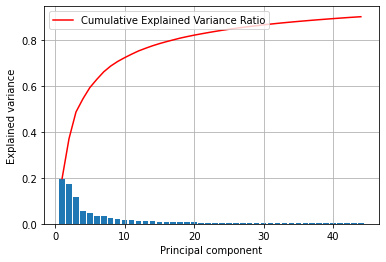

In [24]:
plt.bar(range(1,len(pca15.explained_variance_ratio_ )+1),pca15.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.plot(range(1,len(pca15.explained_variance_ratio_ )+1),
         np.cumsum(pca15.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance Ratio")
plt.legend(loc='upper left')
plt.grid()
plt.savefig('explained_variance_ratio_pca5.pdf')

In [25]:
low_dim = pca15.transform(dataset)
reconstructed = pca15.inverse_transform(low_dim)

In [26]:
low_dim_all = pca99.transform(dataset)
reconstructed_all = pca99.inverse_transform(low_dim_all)

In [44]:
print(low_dim_all.shape, reconstructed_all.shape, pca99.components_.shape)
print(pca15.components_.shape)

(213, 213) (213, 65536) (213, 65536)
(44, 65536)


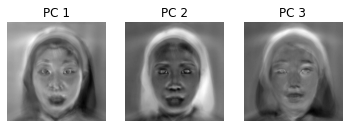

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.axis('off')
ax1.imshow(pca15.components_[0].reshape(256,256),cmap='gray') 
ax1.title.set_text('PC 1')

ax2.axis('off')
ax2.imshow(pca15.components_[1].reshape(256,256),cmap='gray')
ax2.title.set_text('PC 2')

ax3.axis('off')
ax3.imshow(pca15.components_[2].reshape(256,256),cmap='gray')
ax3.title.set_text('PC 3')

plt.savefig('eigenFaces.pdf', bbox_inches='tight')

In [46]:
def plot_principal_component(index_image, index_pc):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

  original = dataset[index_image].reshape((256,256))
  eigenvector = pca15.components_[index_pc].reshape((256,256))
  difference = np.sqrt(np.power(np.subtract(original, eigenvector),2))

  vmax = max(np.max(original), np.max(eigenvector))
  vmin = np.min(difference)

  ax1.axis('off')
  ax1.title.set_text('Original')
  ax1.imshow(original, cmap='gray', vmin=0, vmax=vmax)

  ax2.axis('off')
  ax2.title.set_text('First eigenvector')
  ax2.imshow(eigenvector, cmap='gray')

  ax3.axis('off')
  ax3.title.set_text('Difference')
  ax3.imshow(difference,cmap='hot', vmin = vmin, vmax = vmax)

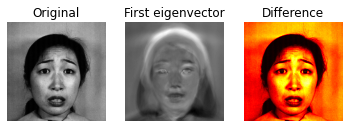

In [47]:
plot_principal_component(6,2)

In [48]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca2.fit(dataset)
low_dim2 = pca2.transform(dataset)

In [130]:
def label_to_int(label):
    label_dis = set(label)
    conv_dict = {}
    counter = 0
    int_labels = []
    for l in list(label_dis):
        conv_dict[l] = counter
        counter += 1
    for l in label:
        int_labels.append(conv_dict[l])
    int_to_label_dict = {value:key for (key,value) in conv_dict.items()}

    return int_labels, conv_dict, int_to_label_dict
int_label, label_to_int_dict, int_to_label_dict = label_to_int(label)

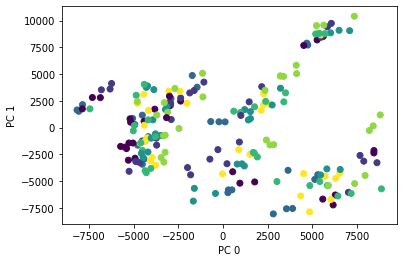

In [63]:
import matplotlib.pyplot as plt

#plt.axis('off')
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.scatter(low_dim2[:,0],low_dim2[:,1],c=int_label)
plt.savefig('pca_2Dimension.pdf', bbox_inches='tight')

In [64]:
def plot(index):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

  original = dataset[index].reshape((256,256))
  pred = reconstructed[index].reshape((256,256))
  difference = np.sqrt(np.power(np.subtract(original, pred),2))

  vmax = max(np.max(original), np.max(pred))
  vmin = np.min(difference)

  ax1.axis('off')
  ax1.title.set_text('Original')
  ax1.imshow(original, cmap='gray', vmin=0, vmax=vmax)

  ax2.axis('off')
  ax2.title.set_text('Reconstructed')
  ax2.imshow(pred, cmap='gray', vmin=0, vmax= vmax)

  ax3.axis('off')
  ax3.title.set_text('Difference')
  ax3.imshow(difference,cmap='hot', vmin = vmin, vmax = vmax)

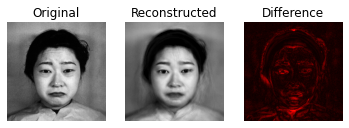

In [65]:
plot(40)

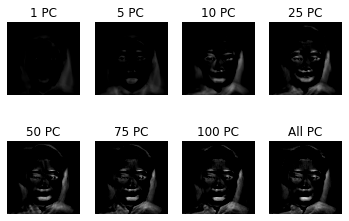

In [66]:
fig, axes = plt.subplots(2, 4)
index=25
pca1Rec = (low_dim_all[index,:1][np.newaxis]@pca99.components_[:1,:]).reshape((256,256))
pca5Rec = (low_dim_all[index,:6][np.newaxis]@pca99.components_[:6,:]).reshape((256,256))
pca10Rec = (low_dim_all[index,:11][np.newaxis]@pca99.components_[:11,:]).reshape((256,256))
pca25Rec = (low_dim_all[index,:26][np.newaxis]@pca99.components_[:26,:]).reshape((256,256))
pca50Rec = (low_dim_all[index,:51][np.newaxis]@pca99.components_[:51,:]).reshape((256,256))
pca75Rec = (low_dim_all[index,:76][np.newaxis]@pca99.components_[:76,:]).reshape((256,256))
pca100Rec = (low_dim_all[index,:101][np.newaxis]@pca99.components_[:101,:]).reshape((256,256))
pcaFull = (low_dim_all[index,:][np.newaxis]@pca99.components_[:,:]).reshape((256,256))

vmax = max(np.max(pca5Rec),np.max(pca1Rec),np.max(pca10Rec),np.max(pca25Rec),np.max(pca50Rec),np.max(pca100Rec),np.max(pca75Rec),np.max(pcaFull))


axes[0][0].axis('off')
axes[0][0].title.set_text('1 PC')
axes[0][0].imshow(pca1Rec, cmap='gray', vmin=0, vmax= vmax)

axes[0][1].axis('off')
axes[0][1].title.set_text('5 PC')
axes[0][1].imshow(pca5Rec, cmap='gray', vmin=0, vmax=vmax)

axes[0][2].axis('off')
axes[0][2].title.set_text('10 PC')
axes[0][2].imshow(pca10Rec, cmap='gray', vmin=0, vmax= vmax)

axes[0][3].axis('off')
axes[0][3].title.set_text('25 PC')
axes[0][3].imshow(pca25Rec, cmap='gray', vmin=0, vmax= vmax)

axes[1][0].axis('off')
axes[1][0].title.set_text('50 PC')
axes[1][0].imshow(pca50Rec, cmap='gray', vmin=0, vmax= vmax)

axes[1][1].axis('off')
axes[1][1].title.set_text('75 PC')
axes[1][1].imshow(pca75Rec, cmap='gray', vmin=0, vmax= vmax)

axes[1][2].axis('off')
axes[1][2].title.set_text('100 PC')
axes[1][2].imshow(pca100Rec, cmap='gray', vmin=0, vmax= vmax)

axes[1][3].axis('off')
axes[1][3].title.set_text('All PC')
axes[1][3].imshow(pcaFull, cmap='gray', vmin=0, vmax= vmax)

plt.savefig('face_reconstruction.pdf', bbox_inches='tight')

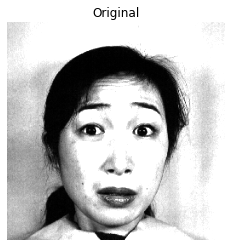

In [67]:
fig, (ax1) = plt.subplots(1, 1)
original = dataset[8].reshape((256,256))

ax1.axis('off')
ax1.title.set_text('Original')
ax1.imshow(original, cmap='gray', vmin=0, vmax=vmax)

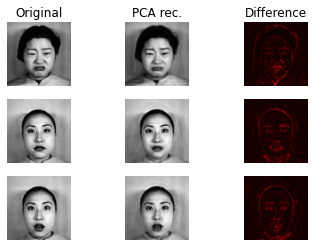

In [68]:
fig, axes = plt.subplots(3, 3)
totalPlots = axes.shape[0]*axes.shape[1]

for y in range(axes.shape[0]):
    index = np.random.randint(0,100)
    if y==0:
      axes[y][0].title.set_text('Original')
      axes[y][1].title.set_text('PCA rec.')
      axes[y][2].title.set_text('Difference')

    vmax = max(np.max(dataset[index]), np.max(reconstructed[index]))
  
    axes[y][0].axis('off')
    axes[y][0].imshow(dataset[index].reshape((256,256)), cmap='gray', vmin=0, vmax=vmax)

    axes[y][1].axis('off')
    axes[y][1].imshow(reconstructed[index].reshape((256,256)), cmap='gray', vmin=0, vmax=vmax)

    axes[y][2].axis('off')
    differenceInReconstruction = np.sqrt(np.power(dataset[index].reshape((256,256))-reconstructed[index].reshape((256,256)),2))
    vmin = np.min(differenceInReconstruction)
    axes[y][2].imshow(differenceInReconstruction, cmap='hot', vmin=vmin, vmax=vmax)

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [71]:
labels = np.array(int_label)

In [79]:
import time

accuracy = []
time_ = []
for i in range(213):
  kf = KFold(n_splits=213, shuffle=True)
  pca = PCA(n_components=i+1)
  local_dataset = pca.fit_transform(dataset)
  clf = SVC()
  predictions = np.zeros(213)
  print(f'PCs up to {i}')
  count=0
  time_start = time.time()
  for train_index, test_index in kf.split(local_dataset):
    #print(f'Image {count}')
    count+=1
    X_train, X_test = local_dataset[train_index], local_dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[test_index] = y_pred

  time_elapsed = (time.time() - time_start)
  print(f'Time elapsed: {time_elapsed}\n')
  accuracy.append(accuracy_score(labels, predictions))
  time_.append(time_elapsed)

PCs up to 0
Time elapsed: 0.9399991035461426

PCs up to 1
Time elapsed: 1.0210046768188477

PCs up to 2
Time elapsed: 0.98500657081604

PCs up to 3
Time elapsed: 0.9540162086486816

PCs up to 4
Time elapsed: 0.9239990711212158

PCs up to 5
Time elapsed: 1.107999563217163

PCs up to 6
Time elapsed: 1.0190017223358154

PCs up to 7
Time elapsed: 1.0370025634765625

PCs up to 8
Time elapsed: 1.0199992656707764



KeyboardInterrupt: 

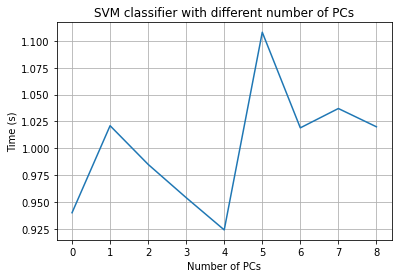

In [81]:
plt.plot(time_)
plt.grid()
plt.xlabel('Number of PCs')
plt.ylabel('Time (s)')
plt.title('SVM classifier with different number of PCs')
plt.savefig('svm_classifications_time.pdf', bbox_inches='tight')

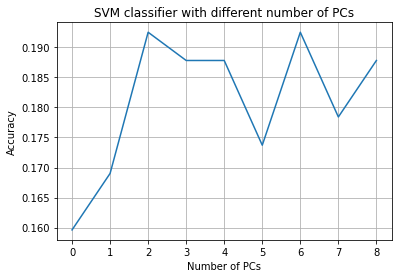

In [82]:
plt.plot(accuracy)
plt.grid()
plt.xlabel('Number of PCs')
plt.ylabel('Accuracy')
plt.title('SVM classifier with different number of PCs')
plt.savefig('svm_classifications_accuracy.pdf', bbox_inches='tight')

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

In [89]:
import time

accuracy = []
time_ = []
for i in range(213):
  #rfc = RandomForestClassifier()
  kf = KFold(n_splits=213, shuffle=True)
  pca = PCA(n_components=i+1)
  local_dataset = pca.fit_transform(dataset)
  clf = RandomForestClassifier()
  predictions = np.zeros(213)
  print(f'PCs up to {i}')
  count=0
  time_start = time.time()
  for train_index, test_index in kf.split(local_dataset):
    #print(f'Image {count}')
    count+=1
    X_train, X_test = local_dataset[train_index], local_dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[test_index] = y_pred

  time_elapsed = (time.time() - time_start)
  print(f'Time elapsed: {time_elapsed}\n')
  accuracy.append(accuracy_score(labels, predictions))
  time_.append(time_elapsed)

PCs up to 0
Time elapsed: 33.77300262451172

PCs up to 1
Time elapsed: 33.516005992889404

PCs up to 2
Time elapsed: 32.78500270843506

PCs up to 3


KeyboardInterrupt: 

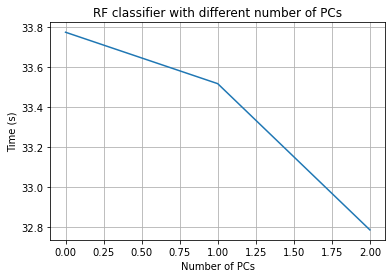

In [91]:
plt.plot(time_)
plt.grid()
plt.xlabel('Number of PCs')
plt.ylabel('Time (s)')
plt.title('RF classifier with different number of PCs')
plt.savefig('RF_time.pdf', bbox_inches='tight')

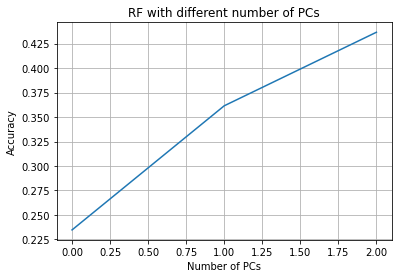

In [92]:
plt.plot(accuracy)
plt.grid()
plt.xlabel('Number of PCs')
plt.ylabel('Accuracy')
plt.title('RF with different number of PCs')
plt.savefig('RF_accuracy.pdf', bbox_inches='tight')

In [99]:
from sklearn.neighbors import KNeighborsClassifier
import time

accuracy = []
time_ = []
for i in range(213):
  #rfc = RandomForestClassifier()
  kf = KFold(n_splits=213, shuffle=True)
  pca = PCA(n_components=i+1)
  local_dataset = pca.fit_transform(dataset)
  clf = KNeighborsClassifier()
  predictions = np.zeros(213)
  print(f'PCs up to {i}')
  count=0
  time_start = time.time()
  for train_index, test_index in kf.split(local_dataset):
    #print(f'Image {count}')
    count+=1
    X_train, X_test = local_dataset[train_index], local_dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[test_index] = y_pred

  time_elapsed = (time.time() - time_start)
  print(f'Time elapsed: {time_elapsed}\n')
  accuracy.append(accuracy_score(labels, predictions))
  time_.append(time_elapsed)

PCs up to 0
Time elapsed: 0.2520017623901367

PCs up to 1
Time elapsed: 0.30100440979003906

PCs up to 2
Time elapsed: 0.2690083980560303

PCs up to 3
Time elapsed: 0.2560155391693115

PCs up to 4
Time elapsed: 0.31599855422973633

PCs up to 5
Time elapsed: 0.30499792098999023



KeyboardInterrupt: 

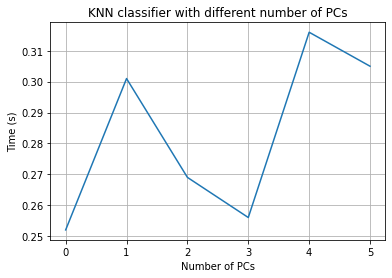

In [102]:
plt.plot(time_)
plt.grid()
plt.xlabel('Number of PCs')
plt.ylabel('Time (s)')
plt.title('KNN classifier with different number of PCs')
plt.savefig('KNN_time.pdf', bbox_inches='tight')

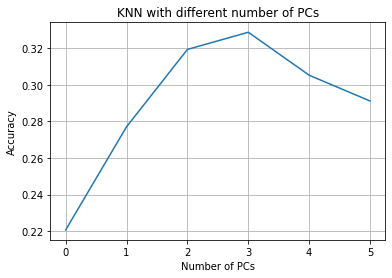

In [103]:
plt.plot(accuracy)
plt.grid()
plt.xlabel('Number of PCs')
plt.ylabel('Accuracy')
plt.title('KNN with different number of PCs')
plt.savefig('KNN_accuracy.pdf', bbox_inches='tight')

In [104]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components=190, kernel='cosine', fit_inverse_transform=True)
X_transformed = transformer.fit_transform(dataset)
reconstructed_kernel = transformer.inverse_transform(X_transformed)

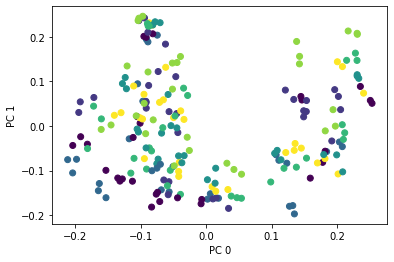

In [105]:
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

pca2_kernel = KernelPCA(n_components=2, kernel='cosine')
low_dim2_kernel = pca2_kernel.fit_transform(dataset)
#plt.axis('off')
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.scatter(low_dim2_kernel[:,0],low_dim2_kernel[:,1],c=labels)
plt.savefig('pca_2Dimension_kernel.pdf', bbox_inches='tight')

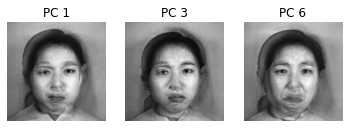

In [106]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.axis('off')
ax1.imshow(transformer.dual_coef_[1].reshape(256,256),cmap='gray')
ax1.title.set_text('PC 1')

ax2.axis('off')
ax2.imshow(transformer.dual_coef_[2].reshape(256,256),cmap='gray')
ax2.title.set_text('PC 3')

ax3.axis('off')
ax3.imshow(transformer.dual_coef_[5].reshape(256,256),cmap='gray')
ax3.title.set_text('PC 6')

plt.savefig('eigenFaces.pdf', bbox_inches='tight')

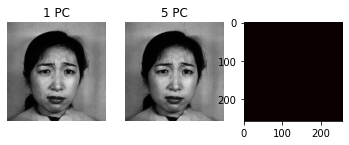

In [107]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
index=3

transformer = KernelPCA(n_components=100, kernel='poly', fit_inverse_transform=True)
X_transformed = transformer.fit_transform(dataset)
reconstructed_kernel = transformer.inverse_transform(X_transformed)
pca1Rec = (reconstructed_kernel[index]).reshape((256,256))


transformer = KernelPCA(n_components=50, kernel='poly', fit_inverse_transform=True)
X_transformed = transformer.fit_transform(dataset)
reconstructed_kernel = transformer.inverse_transform(X_transformed)
pca5Rec = (reconstructed_kernel[index]).reshape((256,256))

ax1.axis('off')
ax1.title.set_text('1 PC')
ax1.imshow(pca1Rec, cmap='gray', vmin=0, vmax= vmax)

ax2.axis('off')
ax2.title.set_text('5 PC')
ax2.imshow(pca5Rec, cmap='gray', vmin=0, vmax= vmax)

differenceInReconstruction = np.sqrt(np.power(pca1Rec-pca5Rec,2))
vmin = np.min(differenceInReconstruction)
ax3.imshow(differenceInReconstruction, cmap='hot', vmin=vmin, vmax=vmax)

### FACE REGOGNITION


In [108]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC

X = dataset
y = labels
target_names = np.unique(labels)
target_names=list(map(str,target_names))


# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [109]:
# Compute a PCA 
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
 
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [113]:
print("Fitting the classifier to the training set")
param_grid = {
            # 'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          #'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
    
    
        'C': [  100000000000e4],
        'gamma': [ 0.000000001]
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000000000000000.0, class_weight='balanced', gamma=1e-09)


In [114]:
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         9
           1       1.00      0.36      0.53        11
           2       1.00      0.14      0.25         7
           3       0.75      0.33      0.46         9
           4       1.00      0.20      0.33        10
           5       1.00      0.38      0.55         8
           6       1.00      0.50      0.67        10

    accuracy                           0.42        64
   macro avg       0.85      0.42      0.45        64
weighted avg       0.85      0.42      0.46        64



In [115]:
print("Confusion Matrix is:")
print(confusion_matrix(y_test, y_pred, labels = range(10)))

Confusion Matrix is:
[[9 0 0 0 0 0 0 0 0 0]
 [7 4 0 0 0 0 0 0 0 0]
 [6 0 1 0 0 0 0 0 0 0]
 [6 0 0 3 0 0 0 0 0 0]
 [8 0 0 0 2 0 0 0 0 0]
 [4 0 0 1 0 3 0 0 0 0]
 [5 0 0 0 0 0 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [116]:
target_names

['0', '1', '2', '3', '4', '5', '6']

In [138]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (int_to_label_dict[int(pred_name)], int_to_label_dict[int(true_name)])
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        plt.savefig('Face_recognition.png', bbox_inches='tight')

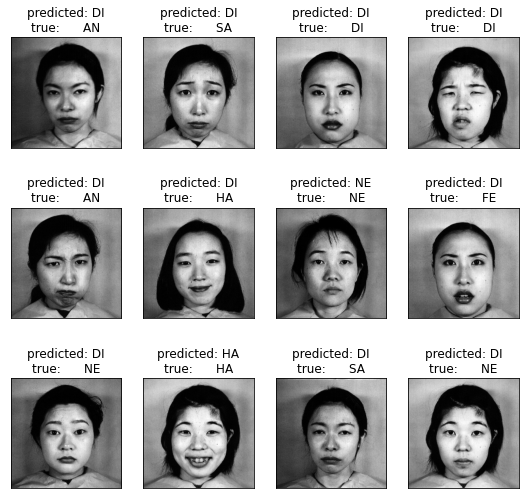

In [139]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, 256, 256)

In [ ]:

accuracy = []
time_ = []
for i in range(213):
  #rfc = RandomForestClassifier()
  kf = KFold(n_splits=213, shuffle=True)
  pca = PCA(n_components=i+1)
  local_dataset = pca.fit_transform(dataset)
  clf = RandomForestClassifier()
  predictions = np.zeros(213)
  print(f'PCs up to {i}')
  count=0
  time_start = time.time()
  for train_index, test_index in kf.split(local_dataset):
    #print(f'Image {count}')
    count+=1
    X_train, X_test = local_dataset[train_index], local_dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[test_index] = y_pred

  time_elapsed = (time.time() - time_start)
  print(f'Time elapsed: {time_elapsed}\n')
  accuracy.append(accuracy_score(labels, predictions))
  time_.append(time_elapsed)

In [ ]:
### LDA after PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

accuracy_lda_pca = []
time_lda_pca = []
for i in range(213):
  kf = KFold(n_splits=213, shuffle=True)
  pca = PCA(n_components=i+1)
  local_dataset = pca.fit_transform(dataset)
  clf = LinearDiscriminantAnalysis()
  predictions = np.zeros(213)
  print(f'PCs up to {i}')
  count=0
  time_start = time.time()
  for train_index, test_index in kf.split(local_dataset):
    count+=1
    X_train, X_test = local_dataset[train_index], local_dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[test_index] = y_pred

  time_elapsed = (time.time() - time_start)
  print(f'Time elapsed: {time_elapsed}\n')
  acc = accuracy_score(labels, predictions)
  print(f'Accuracy: {acc}')
  accuracy_lda_pca.append(acc)
  time_lda_pca.append(time_elapsed)

In [ ]:
kf = KFold(n_splits=213, shuffle=True)
  pca = PCA(n_components=i+1)
  local_dataset = pca.fit_transform(dataset)
  clf = LinearDiscriminantAnalysis()
  predictions = np.zeros(213)
  print(f'PCs up to {i}')
  count=0
  time_start = time.time()
  for train_index, test_index in kf.split(local_dataset):
    count+=1
    X_train, X_test = local_dataset[train_index], local_dataset[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions[test_index] = y_pred

  time_elapsed = (time.time() - time_start)
  print(f'Time elapsed: {time_elapsed}\n')
  acc = accuracy_score(labels, predictions)
  print(f'Accuracy: {acc}')
  accuracy_lda_pca.append(acc)
  time_lda_pca.append(time_elapsed)